FSSC Science Tools
=========================
Data Retrieval, Selection and Exploration
-------------------------

This tutorial is designed to not only make you comfortable running a LAT analysis but also make you familiar with the data and where to go if you want to find more information.  At the end of this tutorial and the likelihood tutorial you should be able to know what all of the various file formats are and be able to perform your own customized simple analysis.  

**Goal:**  *Find information, download data, explore data, make simple views of the data*

Setting up the Summer School VM
-------------------

In order to follow along with this tutorial, you need to have the Docker software package and the Fermi container FermiBottle, installed and running. 

The software, instructions on getting started, and iPhython notebooks that we'll be following during the school are all on GitHub at:

https://github.com/fermi-lat/FermiBottle

If you go to the project and look at the wiki documentation link, you will see the setup instructions:

Accessing these lectures
------------------------

In your browser, go to the [Confluence page](https://confluence.slac.stanford.edu/display/LSP/Fermi+Summer+School+2021) where the lectures are linked. If you click on one of the notebooks it will open in jupyter's notebook viewer. 

If you want copies of the content of the notebooks, you can download the contents from the GitHub repository. https://github.com/FermiSummerSchool/ 

If you want to run a notebook locally in the VM, change into the directory where you have saved the notebooks and run them by typing:

> \> notebook

This will start the jupyter notebook server using this command 'jupyter notebook --ip 00.00.00.00 --no-browser' and will provide a link that you can paste into your browser's address bar. Then, click on a notebook and it will open in a new tab.

In [ ]:
from IPython.display import Image,HTML,IFrame

Now...Where do we start?
---------------------------

Go to the [FSSC Website](http://fermi.gsfc.nasa.gov/ssc/)&rarr;[Data](http://fermi.gsfc.nasa.gov/ssc/data/)&rarr;[Data Analysis](http://fermi.gsfc.nasa.gov/ssc/data/analysis/)&rarr;[System Overview](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/overview.html)


In [ ]:
HTML("<img src='https://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/images/overview/STflow_new.jpg' width='800' height='400'></iframe>")

### Multiple levels of documentation

Available from [FSSC Website](http://fermi.gsfc.nasa.gov/ssc/)&rarr;[Data](http://fermi.gsfc.nasa.gov/ssc/data/)&rarr;[Documentation](http://fermi.gsfc.nasa.gov/ssc/data/analysis/documentation/)

![Documentation](images/FSSC_Documentation.png)


* [Installation](http://fermi.gsfc.nasa.gov/ssc/data/analysis/software/) 
    * Details the installation procedure
* [LAT Analysis Start Page](http://http://fermi.gsfc.nasa.gov/ssc/data/analysis/LAT_essentials.html)
    * Summary of the important resources that are needed for standard LAT analysis
* [Analysis Threads](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/) 
    * Examples of actual science analysis where you can follow along step-by-step
* [Cicerone](http://translate.google.com/#it/en/cicerone)
    * General information on the satellite and instruments
    * Describes instrumentation and data acquisition
    * Explains analysis methods
* [Individual Tool Descriptions](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/references.html) 
    * Explains individual tools in detail
    * (Identical to the information available via [*fhelp*](http://heasarc.gsfc.nasa.gov/ftools/users/node7.html)) 

### What if I can't figure something out and I am not at the summer school?

Contact us!  fermihelp@milkyway.gsfc.nasa.gov . Most of us are nice...most of the time.

### Getting the data
Go to the [FSSC Website](http://fermi.gsfc.nasa.gov/ssc/)&rarr;[Data](http://fermi.gsfc.nasa.gov/ssc/data/)&rarr;[Data Access](http://fermi.gsfc.nasa.gov/ssc/data/access/)

![DataProd](images/FSSC_DataProd.png)

### Getting our Data
We're going to look at a 20 degree region around the AGN 3C 279 from August 4, 2008 to February 4, 2009 and perform a detailed source anlysis so let's use the LAT data server.

Go to the [FSSC Website](http://fermi.gsfc.nasa.gov/ssc/)&rarr;[Data](http://fermi.gsfc.nasa.gov/ssc/data/)&rarr;[LAT Data Server](http://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/LATDataQuery.cgi)

![DataServ](images/FSSC_DataServ.png)

***How do I fill in these parameters?***

(You can click on the field name for more details.)

* *Object name or coordinates*: you can use the NED/Simbad/GRB Name or the coordinates (like RA,Dec)
    * If you use coordinate lookup, be careful with the coordinates it uses. A name may correspond to several different positions.
* *Search Radius*: This depends on your source region.  I usually do an anlysis on 10 - 15 degrees but I always download 30 degrees of data so I have freedom later to change my mind.  If you want to grab more than this, you probably should think about using the weekly files.
* *Observation dates*:  Lots of options (see the help).  [xtime](http://heasarc.gsfc.nasa.gov/cgi-bin/Tools/xTime/xTime.pl) is very useful.
* *Energy Range*: separated by a comma.
* *LAT data type*: Photon or Extended, more on this later.
* *Spacecraft data*: yes.  You want this.

Here are the selection commands so you can copy/paste

* Coordinates: 194.05, -5.79
* Search Radius: 30
* Time range (MET): 239557417,255398400 (or START, 2009-02-04 00:00:00)
* Energy range (MeV): 100, 500000

I've already downloaded these data. Here's the resulting page (for the record).

![DataServer1](images/FSSC_DataServer1.png)

If you click on the link to get to the query result you get this:

https://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/QueryResults.cgi?id=L190522170052BB65347F15


![DataServer2](images/FSSC_DataServer2.png)

You could click the *Available* links or you could just use the *wget* commands in a terminal window.

We put these in the data directory of the current working directory, and rename them for ease of use to SC00.fits, PH00.fits and PH01.fits.

In [ ]:
ls ../data/

So, what do we have now?  We've got a photon file (you could get several of these depending on how the query was executed) and one spacecraft file. According to the data server, the photon file contains 569,325 events.

You can use the ftool *fv* to investigate these FITS tables directly.

There's a row for every event and each column details all of the information about that event.  You could click the header to find more details or check out the [information about the columns](http://fermi.gsfc.nasa.gov/ssc/data/analysis/documentation/Cicerone/Cicerone_Data/LAT_Data_Columns.html) on the FSSC site.  We can have a look at them.  And you can see what the 'extended' data are all about.

![Columns](images/FSSC_Columns.png)

The extended file just has some extra information about each event.  

This page also details what's in the spacecraft file.  You can use 'fv' to plot some of these parameters or we can actually plot them here in python.

In [34]:
from astropy.io import fits as pyfits
import matplotlib.pyplot as plt


In [35]:
sc_hdulist = pyfits.open('/Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/SC00.fits')

sc_hdulist.info()


Filename: /Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/SC00.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   ()      
  1  SC_DATA       1 BinTableHDU    157   443576R x 31C   [D, D, 3E, E, E, D, E, E, E, E, E, E, L, E, E, E, E, E, E, E, J, B, I, D, D, D, D, D, E, E, 3E]   


In [36]:
sc_data = sc_hdulist[1].data

sc_data

FITS_rec([(6.78871767e+08, 6.78871797e+08, [-2671727.5,  5620160. ,  2968271. ], 25.639301 ,   77.811035, 520401.41541263, 115.42561, 25.500795 , 1.7998608, 1.1361618, 20.254116, 21.370266 ,  0, 107.95859 ,  75.3715  , 106.38516, -14.62322 , 301.69412, 64.36544 ,  50.015404, 5, 1, 1, 27.6442039 , -0.10395553,  0.07349431,  7.94403036e-01,  0.59389869, 106.15814,  22.605505, [-6802.527  , -3400.6326 ,   326.55536]),
          (6.78871797e+08, 6.78871827e+08, [-2874303.2,  5515083.5,  2976436.2], 25.71422  ,   79.787315, 520566.66108361, 117.52723, 25.575428 , 1.8019173, 1.1348897, 20.166939, 21.391182 ,  0, 112.77673 ,  75.53287 , 105.45575, -14.354082, 301.68436, 64.365746,  50.015354, 5, 1, 1, 27.66570113, -0.10897246,  0.06308279,  7.90637655e-01,  0.59919751, 106.15849,  22.605467, [-6701.329  , -3603.8162 ,   217.78345]),
          (6.78871827e+08, 6.78871857e+08, [-3073735. ,  5403973.5,  2981336.8], 25.758907 ,   81.7656  , 520739.71743915, 119.63086, 25.619946 , 1.8012257, 1.133

### Check data quality

(-0.1, 1.1)

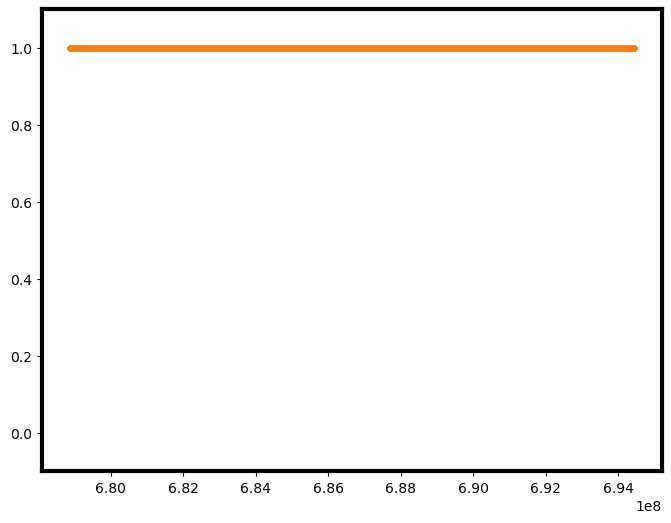

In [37]:

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

plt.plot(sc_data.field('START'), sc_data.field('DATA_QUAL'), '.')
plt.plot(sc_data.field('START'), sc_data.field('LAT_CONFIG'), '.')

ax.set_ylim(-0.1,1.1)


[Cool Cool Cool](http://www.youtube.com/watch?v=8IIrf_JSuQk).  You can see that there were some times in there when the LAT data quality was less than perfect.  We'll need to filter these out and figure out which of the events we want to keep.

Filtering and Selecting Data
----------------------------

timeline of the tutorial vedio: 13:10

You can filter and select on any of the parameters of the events but there are some [recommendations and good practices](http://fermi.gsfc.nasa.gov/ssc/data/analysis/documentation/Cicerone/Cicerone_Data_Exploration/Data_preparation.html) listed at the FSSC site.


![Event_recommendations](images/Event_recommendations.png)

Let's talk about these for a bit:

* The minimum and maximum energy cuts are pretty obvious.  Many analyses don't work as well below 100 MeV and need extra care. 
* Zenith Angle:  This cut helps to exclude photons originating from the Earth's limb.
* Event Class: The LAT team classifies events based on the probability that they are photons.  Each event class has distinct Instrument Response Functions (the description of how the instrument responds to events). With the exception of Solar Flare data, the event classes are nested as shown below.

In [6]:
fig = figure(figsize=(10, 10), facecolor='w')
ax = axes((0,0,1,1),xticks=[], yticks=[], frameon=False)
ax.set_xlim(0, 11)
ax.set_ylim(0, 11)

patches = [Rectangle((0.5,0.5),9,9, zorder=1, fc='#777777'),
           Rectangle((1,1),7.5,7.5, zorder=1, fc='#999999'),
           Rectangle((1.5,1.5),6.5,6.3, zorder=1, fc='#AAAAAA'),
           Rectangle((2,2),5.5,5, zorder=1, fc='#BBBBBB'),
           Rectangle((2.5,2.5),4.5,3.7, zorder=1, fc='#CCCCCC'),
           Rectangle((3,3),3.5,2.5, zorder=1, fc='#DDDDDD'),
           Rectangle((3.2,3.2),2.3,1.5, zorder=1, fc='#EEEEEE')]

for p in patches:
    ax.add_patch(p)
    
text(1, 9, "All Events",ha='left', va='center', fontsize=16)
text(1.5, 8.1, "Transient020 (evclass=16)",ha='left', va='center', fontsize=16)
text(1.8, 7.4, "Transient010 (evclass=64)",ha='left', va='center', fontsize=16)
text(2.3, 6.6, "Source (evclass=128)",ha='left', va='center', fontsize=16)
text(2.8, 5.8, "Clean (evclass=256)",ha='left', va='center', fontsize=16)
text(3.2, 5, "UltraClean (evclass=512)",ha='left', va='center', fontsize=16)
text(3.4, 4, "UltraCleanVeto\n(evclass=1024)",ha='left', va='center', fontsize=16)
text(0.5,9.7, "Not to scale.",ha='left', va='center', fontsize=16)
show()

NameError: name 'figure' is not defined

In addition to Event Classes, there are also *Event Types*. There are no recommendations made in the table about which event type to use. This means that filtering on event type is an option available to you, but not necessary for these analyses.

Event Types allow you to futher refine your data set, removing events with less desireable characteristics. There are three event types defined in the PASS 8 LAT data:
* Front/Back - filters based on where the conversion occurred in the instrument
* PSF - Divides the data into four quadriles, based on the quality of the reconstructed direction
* EDISP - Divides the data into four quadriles, based on the quality of the reconstructed energy

![EventType_hierarchy](images/EventType_hierarchy.png)

Both *Event Class* and *Event Type* are bitfields. So to use ALL events for a particular class, you can use an event type value of 3, 60, or 960.

### What makes up an Instrument Response Function?

The best place to get a look at this is the [LAT Performance Page](http://www.slac.stanford.edu/exp/glast/groups/canda/lat_Performance.htm) but you have access to the IRFs if you want to play with them. You can find the IRF files in your conda environment:

$CONDA_PREFIX/share/fermitools/refdata/fermi/galdiffuse/


In [7]:
### display instrumnet response function
ls $CONDA_PREFIX/share/fermitools/refdata/fermi/galdiffuse/


SyntaxError: invalid syntax (93667067.py, line 2)

In [8]:
### instrumnet response function documentation
HTML("<iframe src='https://www.slac.stanford.edu/exp/glast/groups/canda/lat_Performance.htm' width='1000' height='500'></iframe>")


NameError: name 'HTML' is not defined

Filtering the Data
------------------

timeline of the tutorual vedio: 20:30

So, for the point source analysis we're doing, we'll use source class events, and we won't filter on event type.  We use *[gtselect](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtselect.txt)* to do the selection.  There are ways to do this from within python (you'll see these in a moment) but we'll run this from a terminal right now. 

Since we were given two separate photon files from the data server we need to make a file list so that when we run *gtselect* it knows to look in both files for events that match our selections.  Here's a quick way to do this:

In [9]:
%system pwd

['/Users/87steven/Documents/ASIAA/Blazar SED code and data']

In [38]:
### look photon file, and spacecraft data in the path
path = '/Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013'

%system ls "{path}"
### events.txt need to be created by myself !!!!


['PH00.fits', 'PH01.fits', 'SC00.fits']

In [39]:
### add photon file path into events.txt
%system ls "{path}"/*PH* > "{path}"/events.txt


[]

In [40]:
%system cat "{path}"/events.txt


['/Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/PH00.fits',
 '/Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/PH01.fits']

Now we're ready to go.  Note in the usage for *gtselect* that the event class isn't listed.  It's a 'hidden parameter', so you'll need to run the tool like this:

> \> gtselect evclass=128 evtype=3

There's lots of info we need to give gtselect so it makes sense to run *gtvcut* on one of our photon files to figure out what we were doing.


In [41]:
%system gtvcut "{path}"/PH00.fits EVENTS


['DSTYP1: TIME',
 'DSUNI1: s',
 'DSVAL1: TABLE',
 'DSREF1: :GTI',
 '',
 'GTIs: (suppressed)',
 '',
 'DSTYP2: BIT_MASK(EVENT_CLASS,128,P8R3)',
 'DSUNI2: DIMENSIONLESS',
 'DSVAL2: 1:1',
 '',
 'DSTYP3: POS(RA,DEC)',
 'DSUNI3: deg',
 'DSVAL3: CIRCLE(329.716958,-30.225578,1)',
 '',
 'DSTYP4: TIME',
 'DSUNI4: s',
 'DSVAL4: 678871786:694423786',
 '',
 'DSTYP5: ENERGY',
 'DSUNI5: MeV',
 'DSVAL5: 100:300000',
 '']

We can then filter the data, using the recommentations in the table above as a guide:

    (fermi) [fermi@4df7918df652 Data_Exploration]$ gtselect evclass=128

    WARNING: version mismatch between CFITSIO header (v3.43) and linked library (v3.41).

    Input FT1 file[] @../data/events.txt
    Output FT1 file[] ../data/3C279_filtered.fits
    RA for new search center (degrees) (0:360) [INDEF] 194.05
    Dec for new search center (degrees) (-90:90) [INDEF] -5.79
    radius of new search region (degrees) (0:180) [INDEF] 30
    start time (MET in s) (0:) [INDEF] 239557417
    end time (MET in s) (0:) [INDEF] 255398400
    lower energy limit (MeV) (0:) [30] 100
    upper energy limit (MeV) (0:) [300000] 500000
    maximum zenith angle value (degrees) (0:180) [180] 100
    Done.
    (fermi) [fermi@4df7918df652 Data_Exploration]$```

Some things to note here:

* For the ballistic tool, we had to explicitly give the event class on the command line (it's a *hidden* parameter).
    * You can change this by manually editing your local version of the *parameter file* for this tool, if you wish.
    * This is not an issue for running in python.
* We put an '@' sign in front of the input filename which tells gtselect that this isn't actually a FITS file but a list of FITS files.
* We used the recommended zenith angle cut of 90 (you can check the documentation to make sure it makes sense for your analysis).
* We could have used INDEF to represent the start and end times if we want to use the full time range of the downloaded file. 
* We reduced the radius from 30 degrees (from the data server) to 15 degrees. This means we had to also provide the RA and DEC values (rather than using INDEF). The science tools use a position keyword that includes all three values. If you declare one, you have to declare them all.
* We used a slightly different position from the one used in the data server.  This is fine if you are reducing the radius. WARNING: if you don't reduce the radius, you should use INDEF for all the parameters (RA, DEC, Radius) to avoid offsetting your circle and ending up with a sliver of sky without data.


You can run all the analysis tools on the command line, as above. However, in python, it's (obviously) easier to run using a python version of the science tools. I'm going to run this using the python toolset called *[gtapps](http://fermi.gsfc.nasa.gov/ssc/data/analysis/user/gtapps_mp_README.txt)*.

In python, this same call to getselect would look like this:

In [42]:
import gt_apps
from gt_apps import filter
filter.pars()



' infile= \'/Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/events.txt\'  outfile= \'/Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/filtered.fits\'  ra=0.272042 dec=-15.851939 rad=1.0 tmin="INDEF" tmax="INDEF" emin=100.0 emax=300000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"'

In [44]:
infile = " '/Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/events.txt' "
outfile = " '/Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/filtered.fits' "

filter['infile'] = " '/Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/events.txt' "
filter['outfile'] = outfile
filter['ra'] = 329.716958  ### seaching coordiante
filter['dec'] = -30.225578
filter['rad'] = 1   ### searching radius
filter['tmin'] = 'INDEF'
filter['tmax'] = 'INDEF'
filter['emin'] = 100    ### lower bound energy range
filter['emax'] = 300000   ### higher bound energy range
filter['zmax'] = 90   ### maximum zenith angle
filter['evclass'] = 128 ### 128 means "Galactic point source" & "off-plane point source" & "galactic diffuse source"
filter['evtype'] = 3



You can check what the command will look like before you run it. This is also useful for logging, and when building scripts.

In [45]:
### print out command selection, will not run command
filter.command()



'time -p gtselect infile= \'/Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/events.txt\'  outfile= \'/Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/filtered.fits\'  ra=329.716958 dec=-30.225578 rad=1.0 tmin="INDEF" tmax="INDEF" emin=100.0 emax=300000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"'

In [46]:
### run the command
filter.run()



time -p gtselect infile= '/Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/events.txt'  outfile= '/Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/filtered.fits'  ra=329.716958 dec=-30.225578 rad=1.0 tmin="INDEF" tmax="INDEF" emin=100.0 emax=300000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 0.17
user 0.08
sys 0.02


If you tried to compute an exposure map later on you'd get a nasty error and I'd get a help desk message from you.

The Filtered Data
-----------------

timeline of the tutorial vedio: 28:45

Let's take a look at what we have.

In [47]:
filtered_data = pyfits.open('/Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/filtered.fits')



In [48]:
filtered_data.info()



Filename: /Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/filtered.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    220   546R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E]   
  2  GTI           1 BinTableHDU     46   2396R x 2C   [D, D]   


Notice in the dimensions that we now have 101,844 events in the combined event file.  This is quite a reduction from the 569k events returned by the query.  Lots of events have been filtered out.  

The next thing to do is to make sure we update the good time interval (the GTI) column using the recommended GTI filters.  These can also be found on the [recommendations and good practices](http://fermi.gsfc.nasa.gov/ssc/data/analysis/documentation/Cicerone/Cicerone_Data_Exploration/Data_preparation.html).  Here's the relevant table:

![Maketime_recommendations](images/Maketime_recommendations.png)

> ** NOTE: For analyses where an ROI-based zenith cut is NOT performed, an exposure correction must be made using the "zmax" option in the <a href="/ssc/data/analysis/scitools/help/gtltcube.txt">gtltcube</a> tool.**
                
So, the relevant column here is the last one; these filters are just filtering on columns in the spacecraft file we looked at before.  We do this via the *[gtmktime](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtmktime.txt)* command, which is called **maketime** in *gtapps*:  

In [52]:
from gt_apps import maketime

scfile = " '/Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/SC00.fits' "
evfile = " '/Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/filtered.fits' "
outfile = '/Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/binned_gti.fits' 

maketime['evfile'] = evfile
maketime['outfile'] =  outfile
maketime['scfile'] = scfile
maketime['filter'] = "DATA_QUAL > 0 && LAT_CONFIG == 1"
maketime['apply_filter'] = 'yes'
maketime['roicut'] = 'no'
maketime.run()


time -p gtmktime scfile= '/Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/SC00.fits'  sctable="SC_DATA" filter="DATA_QUAL > 0 && LAT_CONFIG == 1" roicut=no evfile= '/Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/filtered.fits'  evtable="EVENTS" outfile="/Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/binned_gti.fits" apply_filter=yes overwrite=no header_obstimes=yes tstart=0.0 tstop=0.0 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 0.96
user 0.78
sys 0.07


Some things to note here:

* We gave it the spacecraft file as input (this makes sense).
* We said 'no' to the ROI-based zenith angle cut, as that was the recommendation in the table. This means we will need to apply a zmax cut in *gtltcube* instead.
* Had we said 'yes' to the ROI-based zenith cut, maketime would have made this cut: "angsep(RA_ZENITH,DEC_ZENITH,RA_ROI,DEC_ROI) < ZMAX - ROI_RADIUS". This just cuts out periods when your ROI is close to the zenith and away from the Earth's limb.

Now what do we have...

In [53]:
filtered_data.info()



Filename: /Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/filtered.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    220   546R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E]   
  2  GTI           1 BinTableHDU     46   2396R x 2C   [D, D]   


In [54]:
mktime_data = pyfits.open('/Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/mktime.fits')
mktime_data.info()



Filename: /Users/87steven/Documents/ASIAA/Blazar SED code and data/Fermi_all_sky_survey_data/J2158-3013/mktime.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    225   546R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E]   
  2  GTI           1 BinTableHDU     46   2397R x 2C   [D, D]   


You can see that the maketime command did not actually remove any events. This means that the bad times we saw early on in the spacecraft file were not associated with periods when the LAT was taking data.   

### Things to think about when making data selections

* What scientific question am I trying to answer?
    * Am I looking at a point source?
    * What spectral shape do I expect (hard spectral shapes could benefit from a higher low-energy cut).
    * Is this a short timescale event (~200 s, like a GRB)?
    * Am I interested in a small region or the whole sky?
    * Is the region close to the galactic plane (here lies analysis dragons, might want to raise the energy threshold, make your ROI smaller)

**Always double check the recommended cuts, especially after a data/software release.**  Don't hesitate to ask the FSSC for advice.  We are working scientists and have proably run into the types of problems you are seeing. And if we can't, we can always contact the software developers.

fermihelp@milkyway.gsfc.nasa.gov

To take a quick look at the data, try going through the next tutorial, DATA_Quicklook.ipynb

## What would you like to do with Fermi data?